<a href="https://colab.research.google.com/github/ariflaksito/naive-bayes/blob/master/01_nb_studentpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes
Prediksi pengunduran diri Mahasiswa

In [0]:
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [0]:
data = pd.read_excel('datamhs.xlsx')

In [3]:
data.head()

,JK,MS STUDI,IPK,STATUS
0,P,4,2.343750,Bertahan
1,L,4,3.736111,Bertahan
2,L,4,2.254902,Bertahan
3,L,4,3.086957,Bertahan
4,L,4,3.115942,Bertahan


In [4]:
data.columns

Index(['JK', 'MS STUDI', 'IPK', 'STATUS'], dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data['JK'] = number.fit_transform(data['JK'])
data['STATUS'] = number.fit_transform(data['STATUS'])

In [0]:
features = ["JK", "MS STUDI", "IPK"]
target = "STATUS"

In [0]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(data[features],
    data[target],
    test_size = 0.30,
    random_state = 54)

In [8]:
# Create model NaiveBayes
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred = model.predict(features_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_test, pred)

In [11]:
accuracy

0.7777777777777778

In [12]:
confusion_matrix = pd.crosstab(target_test, pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          16   2
1           6  12


In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


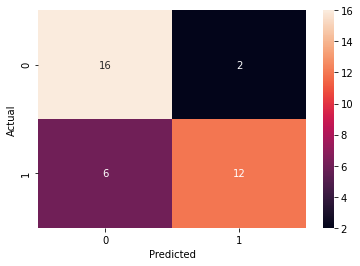

In [14]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()